In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [4]:
pd.options.display.max_rows = 300

In [5]:
pd.options.display.max_columns = 200

In [6]:
# Read in CSV files
covid = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/COVID County Data/covid_county_data_cleaned2.csv')
social = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/SVI2018_US_COUNTY_2.csv')

In [7]:
covid.dtypes

Unnamed: 0          int64
name               object
date               object
fips                int64
lat               float64
long              float64
confirmed           int64
deaths              int64
confirmed_diff      int64
deaths_diff         int64
last_update        object
state              object
state_abbr         object
dtype: object

In [8]:
covid.head()

,Unnamed: 0,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,last_update,state,state_abbr
0,161205,Abbeville,5/17/20,45001,34.223334,-82.461707,35,0,1,0,5/18/20 2:32,South Carolina,SC
1,160071,Acadia,5/17/20,22001,30.295065,-92.414197,198,12,6,1,5/18/20 2:32,Louisiana,LA
2,161656,Accomack,5/17/20,51001,37.767072,-75.632346,688,9,20,0,5/18/20 2:32,Virginia,VT
3,159538,Ada,5/17/20,16001,43.452658,-116.241552,773,22,0,0,5/18/20 2:32,Idaho,ID
4,159770,Adair,5/17/20,19001,41.330756,-94.471059,5,0,1,0,5/18/20 2:32,Iowa,IA


In [9]:
fips_grouped = covid.groupby('fips')[['confirmed', 'deaths', 'confirmed_diff', 'deaths_diff']].sum()
print(fips_grouped)

       confirmed  deaths  confirmed_diff  deaths_diff
fips                                                 
1001         110       4               0            0
1003         254       8               0            0
1005          81       1               2            0
1007          50       1               0            0
1009          46       1               1            1
...          ...     ...             ...          ...
56037         23       0               0            0
56039        100       0               0            0
56041         10       0               0            0
56043         16       0               7            0
90049        219       3              10            0

[2914 rows x 4 columns]


In [10]:
flat_fips = fips_grouped.reset_index()
print(flat_fips)

       fips  confirmed  deaths  confirmed_diff  deaths_diff
0      1001        110       4               0            0
1      1003        254       8               0            0
2      1005         81       1               2            0
3      1007         50       1               0            0
4      1009         46       1               1            1
...     ...        ...     ...             ...          ...
2909  56037         23       0               0            0
2910  56039        100       0               0            0
2911  56041         10       0               0            0
2912  56043         16       0               7            0
2913  90049        219       3              10            0

[2914 rows x 5 columns]


In [11]:
flat_fips.head()

,fips,confirmed,deaths,confirmed_diff,deaths_diff
0,1001,110,4,0,0
1,1003,254,8,0,0
2,1005,81,1,2,0
3,1007,50,1,0,0
4,1009,46,1,1,1


In [12]:
flat_fips.dtypes

fips              int64
confirmed         int64
deaths            int64
confirmed_diff    int64
deaths_diff       int64
dtype: object

In [13]:
# Instead of dropping 50 composite and margin or error variables from the SVI using code, I just deleted them from the csv file (I know, I know)
social.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
0,35,NEW MEXICO,Rio Arriba,35039,5860.869195,39307,20044,12398,-999,-999,-999,3669,7083,9318,6280,1330,34397,755,67,7770,264,763,654
1,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
2,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543
3,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322
4,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112


In [14]:
social.dtypes

ST             int64
STATE         object
COUNTY        object
fips           int64
AREA_SQMI    float64
E_TOTPOP       int64
E_HU           int64
E_HH           int64
E_POV          int64
E_UNEMP        int64
E_PCI          int64
E_NOHSDP       int64
E_AGE65        int64
E_AGE17        int64
E_DISABL       int64
E_SNGPNT       int64
E_MINRTY       int64
E_LIMENG       int64
E_MUNIT        int64
E_MOBILE       int64
E_CROWD        int64
E_NOVEH        int64
E_GROUPQ       int64
dtype: object

In [15]:
# For the SVI, -999 reflects missing values. Apparantly, only one county has -999 vaules in their dataset, so removing.
social =  social[(social.iloc[:, 1:] != -999).all(axis=1)]
social.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
1,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
2,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543
3,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322
4,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112
5,1,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512


In [16]:
# Merge social and covid on fips
merged = pd.merge(social, flat_fips, on='fips')
merged.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,1,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [17]:
merged.dtypes

ST                  int64
STATE              object
COUNTY             object
fips                int64
AREA_SQMI         float64
E_TOTPOP            int64
E_HU                int64
E_HH                int64
E_POV               int64
E_UNEMP             int64
E_PCI               int64
E_NOHSDP            int64
E_AGE65             int64
E_AGE17             int64
E_DISABL            int64
E_SNGPNT            int64
E_MINRTY            int64
E_LIMENG            int64
E_MUNIT             int64
E_MOBILE            int64
E_CROWD             int64
E_NOVEH             int64
E_GROUPQ            int64
confirmed           int64
deaths              int64
confirmed_diff      int64
deaths_diff         int64
dtype: object

In [18]:
merged.shape

(2912, 27)

In [19]:
# I clearly don't know how to drop multiple culumns
merged.drop('ST', axis=1, inplace=True)
merged.head()

,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [20]:
merged.drop('STATE', axis=1, inplace=True)
merged.head()

,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [21]:
merged.drop('COUNTY', axis=1, inplace=True)
merged.head()

,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [22]:
merged.drop('fips', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [23]:
merged.drop('deaths', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,confirmed_diff,deaths_diff
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,0,0
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,1,0
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,0,0
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,0,0


In [24]:
merged.drop('confirmed_diff', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths_diff
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,0
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,0
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,0
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,0


In [25]:
merged.drop('deaths_diff', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328


In [26]:
target_column = ['confirmed'] 
predictors = list(set(list(merged.columns))-set(target_column))
merged[predictors] = merged[predictors]/merged[predictors].max()
merged.describe()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed
count,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000
mean,0.006956,0.010662,0.012916,0.012088,0.009194,0.008836,0.371199,0.006073,0.012660,0.010918,0.013481,0.011500,0.005542,0.003292,0.006207,0.033005,0.003394,0.005382,0.015229,503.108860
std,0.021786,0.033158,0.036538,0.035490,0.031085,0.031367,0.089316,0.025645,0.034993,0.034466,0.035248,0.035696,0.028080,0.024944,0.034336,0.055012,0.022450,0.027590,0.037274,4237.235078
min,0.000014,0.000041,0.000070,0.000058,0.000016,0.000000,0.139334,0.000011,0.000077,0.000031,0.000046,0.000006,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002908,0.001318,0.001839,0.001541,0.001234,0.000901,0.312359,0.000830,0.001925,0.001275,0.002120,0.001298,0.000196,0.000039,0.000109,0.007961,0.000238,0.000479,0.001295,9.000000
50%,0.004098,0.002824,0.003928,0.003336,0.002789,0.002140,0.360219,0.001896,0.003966,0.002843,0.004736,0.003015,0.000672,0.000161,0.000392,0.018833,0.000604,0.001166,0.004136,34.000000
75%,0.006156,0.007442,0.009650,0.008556,0.006719,0.005824,0.412799,0.004215,0.009716,0.007397,0.011069,0.007834,0.002187,0.000755,0.001858,0.037594,0.001610,0.002930,0.013944,152.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192593.000000


In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Not able to get SGD to work
from keras.optimizers import SGD

In [141]:
# Model 1 - Normalized predictors
X = merged[predictors].values
Y = merged[target_column].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape); print(Y_train.shape); print(Y_test.shape)

(2038, 19)
(874, 19)
(2038, 1)
(874, 1)


In [142]:
# Create an empty sequential model
model = Sequential()

In [143]:
model.add(Dense(6, input_dim=19, activation='relu'))
model.add(Dense(1))
opt = SGD(lr=0.1, momentum=0.9)

In [144]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 6)                 120       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])
model.fit(
    X_train,
    Y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 2038 samples
Epoch 1/60
2038/2038 - 1s - loss: 17.2318 - accuracy: 0.0088
Epoch 2/60
2038/2038 - 0s - loss: 15.9004 - accuracy: 0.0093
Epoch 3/60
2038/2038 - 0s - loss: 14.2428 - accuracy: 0.0343
Epoch 4/60
2038/2038 - 0s - loss: 12.9676 - accuracy: 0.0545
Epoch 5/60
2038/2038 - 0s - loss: 11.7832 - accuracy: 0.0545
Epoch 6/60
2038/2038 - 0s - loss: 10.7537 - accuracy: 0.0545
Epoch 7/60
2038/2038 - 0s - loss: 9.9181 - accuracy: 0.0545
Epoch 8/60
2038/2038 - 0s - loss: 9.2319 - accuracy: 0.0545
Epoch 9/60
2038/2038 - 0s - loss: 8.6574 - accuracy: 0.0545
Epoch 10/60
2038/2038 - 0s - loss: 8.1709 - accuracy: 0.0545
Epoch 11/60
2038/2038 - 0s - loss: 7.7508 - accuracy: 0.0545
Epoch 12/60
2038/2038 - 0s - loss: 7.3843 - accuracy: 0.0545
Epoch 13/60
2038/2038 - 0s - loss: 7.0620 - accuracy: 0.0545
Epoch 14/60
2038/2038 - 0s - loss: 6.7753 - accuracy: 0.0545
Epoch 15/60
2038/2038 - 0s - loss: 6.5196 - accuracy: 0.0545
Epoch 16/60
2038/2038 - 0s - loss: 6.2895 - accuracy: 0.0545
Epoch

In [146]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=60, verbose=0)

In [147]:
model_loss, model_accuracy = model.evaluate(
    X_train, Y_train, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 2.9799153570805963, Accuracy: 0.0544651634991169


In [148]:
model.save("covid_model_trained.h5")

In [149]:
from tensorflow.keras.models import load_model
covid_model = load_model("covid_model_trained.h5")

In [150]:
model_loss, model_accuracy = covid_model.evaluate(
    X_test, Y_test, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 3.147034720370644, Accuracy: 0.043478261679410934


In [151]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train)))
pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred))) 

1734.6568542217015
7282.845905017176


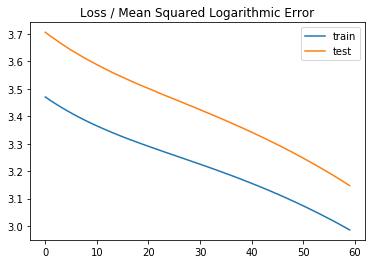

In [152]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [39]:
# Model 2
# Assign X (predictors) and Y (criterion)
X = merged.drop("confirmed", axis=1)
Y = merged["confirmed"].values.reshape(-1, 1)
print(X.shape, Y.shape)

(2912, 19) (2912, 1)


In [40]:
# Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
Y_scaler = StandardScaler().fit(Y_train)
Y_train_scaled = Y_scaler.transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)

In [41]:
X_train.shape

(2184, 19)

In [42]:
X_test.shape

(728, 19)

In [43]:
Y_train.shape

(2184, 1)

In [44]:
Y_test.shape

(728, 1)

In [45]:
# define model
model = Sequential()
model.add(Dense(6, input_dim=19, activation='relu'))
model.add(Dense(1))
opt = SGD(lr=0.01, momentum=0.9)

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    Y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 2184 samples
Epoch 1/60
2184/2184 - 1s - loss: 23114458.7995 - accuracy: 0.0114
Epoch 2/60
2184/2184 - 0s - loss: 23114063.1767 - accuracy: 0.0114
Epoch 3/60
2184/2184 - 0s - loss: 23113635.6895 - accuracy: 0.0362
Epoch 4/60
2184/2184 - 0s - loss: 23113146.6381 - accuracy: 0.0481
Epoch 5/60
2184/2184 - 0s - loss: 23112563.9192 - accuracy: 0.0485
Epoch 6/60
2184/2184 - 0s - loss: 23111913.7271 - accuracy: 0.0485
Epoch 7/60
2184/2184 - 0s - loss: 23111211.4585 - accuracy: 0.0485
Epoch 8/60
2184/2184 - 0s - loss: 23110429.0418 - accuracy: 0.0485
Epoch 9/60
2184/2184 - 0s - loss: 23109597.7306 - accuracy: 0.0485
Epoch 10/60
2184/2184 - 0s - loss: 23108722.0829 - accuracy: 0.0485
Epoch 11/60
2184/2184 - 0s - loss: 23107789.1417 - accuracy: 0.0485
Epoch 12/60
2184/2184 - 0s - loss: 23106815.0593 - accuracy: 0.0485
Epoch 13/60
2184/2184 - 0s - loss: 23105789.7623 - accuracy: 0.0485
Epoch 14/60
2184/2184 - 0s - loss: 23104655.9178 - accuracy: 0.0485
Epoch 15/60
2184/2184 - 0s - loss: 

In [48]:
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=60, verbose=0)

In [49]:
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, Y_train, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 22824153.937528618, Accuracy: 0.04853479936718941


In [50]:
model.save("covid_model_trained.h5")

In [51]:
from tensorflow.keras.models import load_model
covid_model = load_model("covid_model_trained.h5")

In [52]:
model_loss, model_accuracy = covid_model.evaluate(
    X_test_scaled, Y_test, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 3287137.887534341, Accuracy: 0.059065934270620346


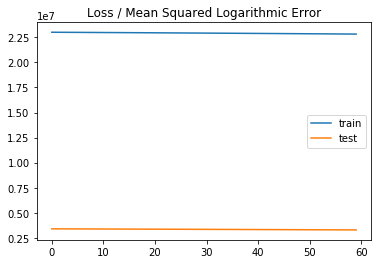

In [53]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [54]:
# Model 3
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=1)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# define model
model = Sequential()
model.add(Dense(12, input_dim=19, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dense(3, activation='linear'))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    Y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 2184 samples
Epoch 1/60
2184/2184 - 1s - loss: 16.9732 - accuracy: 0.0000e+00
Epoch 2/60
2184/2184 - 0s - loss: 15.4290 - accuracy: 0.0000e+00
Epoch 3/60
2184/2184 - 0s - loss: 13.9425 - accuracy: 0.0000e+00
Epoch 4/60
2184/2184 - 0s - loss: 12.3039 - accuracy: 0.0000e+00
Epoch 5/60
2184/2184 - 0s - loss: 11.1707 - accuracy: 0.0000e+00
Epoch 6/60
2184/2184 - 0s - loss: 10.3084 - accuracy: 0.0000e+00
Epoch 7/60
2184/2184 - 0s - loss: 9.7303 - accuracy: 0.0000e+00
Epoch 8/60
2184/2184 - 0s - loss: 9.3299 - accuracy: 0.0000e+00
Epoch 9/60
2184/2184 - 0s - loss: 9.0347 - accuracy: 0.0000e+00
Epoch 10/60
2184/2184 - 0s - loss: 8.8012 - accuracy: 0.0000e+00
Epoch 11/60
2184/2184 - 0s - loss: 8.6134 - accuracy: 0.0000e+00
Epoch 12/60
2184/2184 - 0s - loss: 8.4548 - accuracy: 0.0000e+00
Epoch 13/60
2184/2184 - 0s - loss: 8.3158 - accuracy: 0.0000e+00
Epoch 14/60
2184/2184 - 0s - loss: 8.1955 - accuracy: 0.0000e+00
Epoch 15/60
2184/2184 - 0s - loss: 8.0872 - accuracy: 0.0000e+00
Epoch 

In [58]:
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=60, verbose=0)

In [59]:
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, Y_train, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 6.676347662677695, Accuracy: 0.0


In [60]:
model.save("covid_model_trained.h5")

In [61]:
from tensorflow.keras.models import load_model
covid_model = load_model("covid_model_trained.h5")

In [62]:
model_loss, model_accuracy = covid_model.evaluate(
    X_test_scaled, Y_test, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 6.9101242180709, Accuracy: 0.0


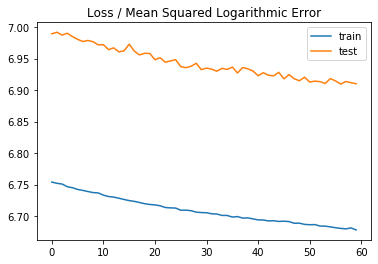

In [63]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [64]:
# Model 4
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# define model
model = Sequential()
model.add(Dense(38, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(38, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [66]:
# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='RMSprop', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 38)                760       
_________________________________________________________________
dense_8 (Dense)              (None, 38)                1482      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 39        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(
    X_train_scaled,
    Y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 2184 samples
Epoch 1/100
2184/2184 - 1s - loss: 523.4556 - mean_absolute_error: 523.4554
Epoch 2/100
2184/2184 - 0s - loss: 521.4211 - mean_absolute_error: 521.4211
Epoch 3/100
2184/2184 - 0s - loss: 517.7472 - mean_absolute_error: 517.7470
Epoch 4/100
2184/2184 - 0s - loss: 513.7643 - mean_absolute_error: 513.7643
Epoch 5/100
2184/2184 - 0s - loss: 510.7471 - mean_absolute_error: 510.7470
Epoch 6/100
2184/2184 - 0s - loss: 509.2950 - mean_absolute_error: 509.2950
Epoch 7/100
2184/2184 - 0s - loss: 508.1916 - mean_absolute_error: 508.1916
Epoch 8/100
2184/2184 - 0s - loss: 506.9531 - mean_absolute_error: 506.9531
Epoch 9/100
2184/2184 - 0s - loss: 505.6588 - mean_absolute_error: 505.6587
Epoch 10/100
2184/2184 - 0s - loss: 503.8254 - mean_absolute_error: 503.8254
Epoch 11/100
2184/2184 - 0s - loss: 501.7600 - mean_absolute_error: 501.7601
Epoch 12/100
2184/2184 - 0s - loss: 498.9300 - mean_absolute_error: 498.9301
Epoch 13/100
2184/2184 - 0s - loss: 494.9415 - mean_absolute_er

In [68]:
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=100, verbose=0)

In [69]:
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, Y_train, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 371.26879998790474, Accuracy: 371.268798828125


In [70]:
model.save("covid_model_trained.h5")

In [71]:
from tensorflow.keras.models import load_model
covid_model = load_model("covid_model_trained.h5")

In [72]:
model_loss, model_accuracy = covid_model.evaluate(
    X_test_scaled, Y_test, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 284.35408573360235, Accuracy: 284.3540954589844


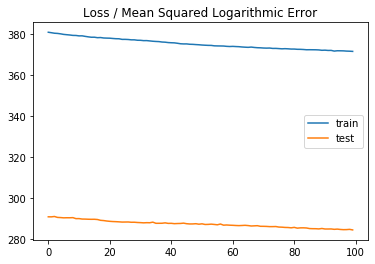

In [73]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()